# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Atidhira Habibillah
- **Email:** masatidhira@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/masatidhira

## Menentukan Pertanyaan Bisnis

- How does the number of bicycle borrowers compare on weekdays and weekends?
- What season gets the most bicycle borrowers?
- What time of day do users borrow the most bicycles?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Data Wrangling

### Gathering Data

The dataset used in this analysis contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the Capital bike share system with the corresponding weather and seasonal information. (Source: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset?)

In [5]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Attribute Information:**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Day Dataframe

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
print('Duplicate data: ', day_df.duplicated().sum())

Duplicate data:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Data type error in dteday column. The data type should be **datetype** because the column represents a date.
- The **yr** and **mnth** columns are not needed because the data is already in the **dteday** column
- The **holiday** column are not needed because the information already in the **workingday** column
- No data duplication
- Complete data amount
- There are no oddities in the data, but to improve readability of the data, some value need to be changed (e.g: change column header names, season column from number 1-4 into season category like spring, winter, etc)

#### Hour Dataframe

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print('Duplicate data: ', hour_df.duplicated().sum())

Duplicate data:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data type error in dteday column. The data type should be **datetype** because the column represents a date.
- The **yr** and **mnth** columns are not needed because the data is already in the **dteday** column
- The **holiday** column are not needed because the information already in the **workingday** column
- No data duplication
- Complete data amount
- There are no oddities in the data, but to improve readability of the data, some value need to be changed (e.g: season column from number 1-4 into season category like spring, winter, etc)

### Cleaning Data

**day_df and hour_df**: Change data type of dteday column from object to datetime

In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**day_df and hour_df**: Delete **yr** and **mnth** column because year and month data can be seen in the **dteday** column

In [14]:
day_df.drop(['yr'], axis=1, inplace=True)
day_df.drop(['mnth'], axis=1, inplace=True)

hour_df.drop(['yr'], axis=1, inplace=True)
hour_df.drop(['mnth'], axis=1, inplace=True)

**day_df and hour_df**: Delete **holiday** column because the information is already in the **workingday** column

In [15]:
day_df.drop(['holiday'], axis=1, inplace=True)

hour_df.drop(['holiday'], axis=1, inplace=True)

**day_df and hour_df**: Change column header names into a more readable name

In [16]:
day_df.rename(columns={'instant':'index', 'dteday':'date', 'weekday':'day',
                       'weathersit':'weather', 'temp':'temperature', 'atemp':'temperature_feel',
                       'hum':'humidity', 'casual':'casual_user', 'registered':'registered_user', 'cnt':'total_user'
                       }, inplace=True)

hour_df.rename(columns={'instant':'index', 'dteday':'date', 'hr':'hour', 'weekday':'day',
                        'weathersit':'weather', 'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity',
                        'casual':'casual_user', 'registered':'registered_user', 'cnt':'total_user'
                        }, inplace=True)

**day_df and hour_df**: Change the values of some columns into a more readable value

In [17]:
season_values = { 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter' }
day_df['season'] = day_df['season'].map(season_values)
hour_df['season'] = hour_df['season'].map(season_values)

weather_values = {1: 'Clear/Partly Cloudy', 2: 'Mist + Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'}
day_df['weather'] = day_df['weather'].map(weather_values)
hour_df['weather'] = hour_df['weather'].map(weather_values)

workingday_values = { 0: 'Weekend/Holiday', 1: 'Working Day'}
day_df['workingday'] = day_df['workingday'].map(workingday_values)
hour_df['workingday'] = hour_df['workingday'].map(workingday_values)

day_values = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
day_df['day'] = day_df['day'].map(day_values)
hour_df['day'] = hour_df['day'].map(day_values)

for col in ['season', 'weather', 'workingday', 'day']:
  day_df[col] = day_df[col].astype('category')
  hour_df[col] = hour_df[col].astype('category')

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             731 non-null    int64         
 1   date              731 non-null    datetime64[ns]
 2   season            731 non-null    category      
 3   day               731 non-null    category      
 4   workingday        731 non-null    category      
 5   weather           731 non-null    category      
 6   temperature       731 non-null    float64       
 7   temperature_feel  731 non-null    float64       
 8   humidity          731 non-null    float64       
 9   windspeed         731 non-null    float64       
 10  casual_user       731 non-null    int64         
 11  registered_user   731 non-null    int64         
 12  total_user        731 non-null    int64         
dtypes: category(4), datetime64[ns](1), float64(4), int64(4)
memory usage: 55.2 KB


In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  category      
 3   hour              17379 non-null  int64         
 4   day               17379 non-null  category      
 5   workingday        17379 non-null  category      
 6   weather           17379 non-null  category      
 7   temperature       17379 non-null  float64       
 8   temperature_feel  17379 non-null  float64       
 9   humidity          17379 non-null  float64       
 10  windspeed         17379 non-null  float64       
 11  casual_user       17379 non-null  int64         
 12  registered_user   17379 non-null  int64         
 13  total_user        17379 non-null  int64         
dtypes: category(4), dateti

## Exploratory Data Analysis (EDA)

### Number of bicycle borrowers on weekdays and weekends

In [20]:
day_df.groupby(by='workingday', observed=True).agg({
    'total_user': ['max', 'min', 'sum', 'mean']
})

total_user                           
                       max  min      sum         mean
workingday                                           
Weekend/Holiday       8714  605  1000269  4330.168831
Working Day           8362   22  2292410  4584.820000

**Insight:**
- Users more often borrow bicycles during working day than on weekends

### Number of bicycle borrowers based on season

In [21]:
day_df.groupby(by='season', observed=True).agg({
    'total_user': ['max', 'min', 'mean', 'sum']
})

total_user                            
              max   min         mean      sum
season                                       
Fall         8714  1115  5644.303191  1061129
Spring       7836   431  2604.132597   471348
Summer       8362   795  4992.331522   918589
Winter       8555    22  4728.162921   841613

**Insight:**
- Users tend to borrow bicycles at fall
- Spring is the season with the fewest users that borrow bicycles

### Number of bicycle borrowers based on time of the day

In [22]:
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

hour_df['time_of_day'] = pd.cut(hour_df['hour'], bins=bins, labels=labels, right=False)
result = hour_df.groupby('time_of_day', observed=True)['total_user'].sum().reset_index()

print(result)

  time_of_day  total_user
0       Night      106509
1     Morning      907319
2   Afternoon     1292742
3     Evening      986109


**Insight:**
- Users tend to borrow bicycles at afternoon (12:00 - 17:59)

## Visualization & Explanatory Analysis

### Question 1: How does the number of bicycle borrowers compare on weekdays and weekends?

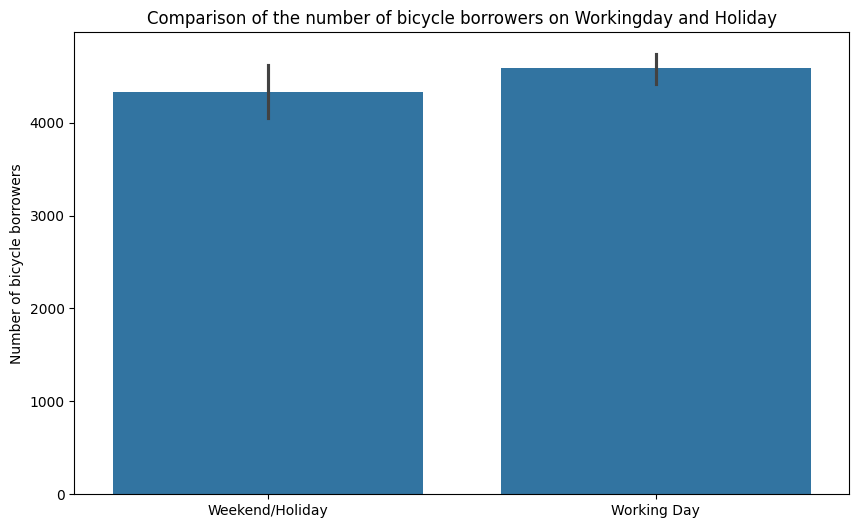

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='workingday',
    y='total_user',
    data=day_df)

plt.title('Comparison of the number of bicycle borrowers on Workingday and Holiday')
plt.xlabel(None)
plt.ylabel('Number of bicycle borrowers')
plt.show()

From the visualization above, it can be seen that the highest number of users borrowing bicycles is in working day, and the lowest is on weekends/holiday.

### Question 2: What season gets the most bicycle borrowers?

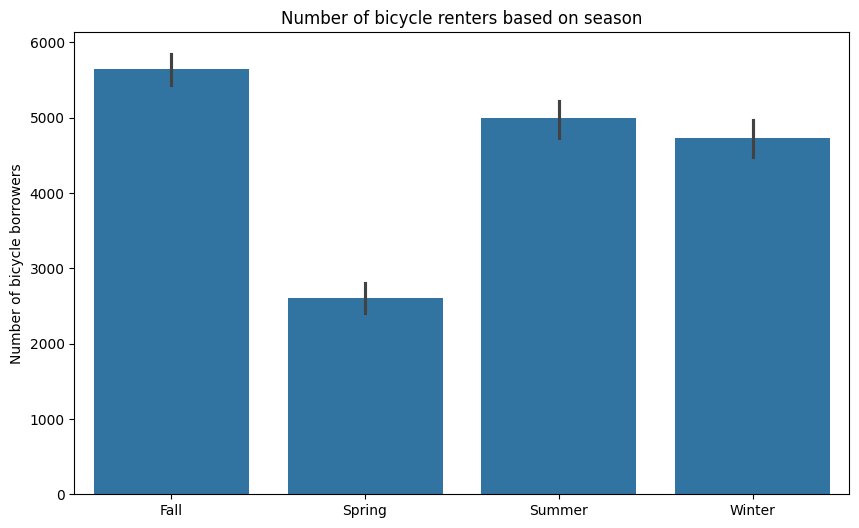

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='season',
    y='total_user',
    data=day_df)

plt.xlabel(None)
plt.ylabel('Number of bicycle borrowers')
plt.title('Number of bicycle renters based on season')
plt.show()

From the visualization above, it can be seen that the highest number of users borrowing bicycles is in the Fall season, and the lowest is in the Spring season

### Question 3: What time of day do users borrow the most bicycles?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


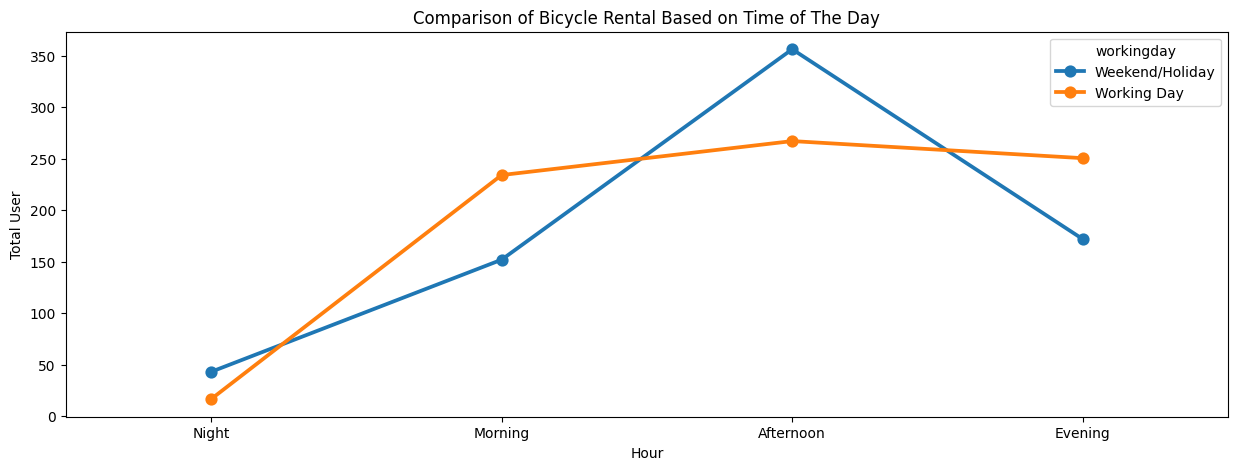

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(
    data=hour_df,
    x='time_of_day',
    y='total_user',
    hue='workingday',
    errorbar=None,
    ax=ax)
ax.set(title='Comparison of Bicycle Rental Based on Time of The Day')
ax.set_ylabel('Total User')
ax.set_xlabel('Hour')
plt.show()

From the visualization above, it can be seen that the highest number of users borrowing bicycles is in the afternoon.

## Conclusion

- Conclusion Question 1: Bicycles that are borrowed on weekdays are more than  bicycles that are borrowed during holidays.
- Conclusion Question 2: Fall season has the most bicycle borrowers compare to other seasons.
- Conclusion Question 3: The peak of bicycle borrowing occurs during the afternoon (12:00-17:59)

## Export Clean Data

In [27]:
day_df.to_csv("dashboard/day_clean.csv", index=False)
hour_df.to_csv("dashboard/hour_clean.csv", index=False)